In [1]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score

In [2]:
url='https://raw.githubusercontent.com/FazlyRabbiBD/Data-Science-Book/master/data-drugs.csv'
df = pd.read_csv(url)
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [ ]:
df.Drug.unique()

array(['drugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [3]:
d = {'HIGH': 2, 'LOW': 0, 'NORMAL': 1}
df['BP'] = df['BP'].map(d)
d = {'M': 1, 'F': 0}
df['Sex'] = df['Sex'].map(d)
d = {'HIGH': 1, 'NORMAL': 0}
df['Cholesterol'] = df['Cholesterol'].map(d)

In [4]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,2,1,25.355,drugY
1,47,1,0,1,13.093,drugC
2,47,1,0,1,10.114,drugC
3,28,0,1,1,7.798,drugX
4,61,0,0,1,18.043,drugY


In [5]:
features = ['Age', 'Sex', 'BP', 'Cholesterol','Na_to_K']
x = df[features]
y = df['Drug']

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=3)

In [7]:
drugTree = DecisionTreeClassifier()
drugTree.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [8]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


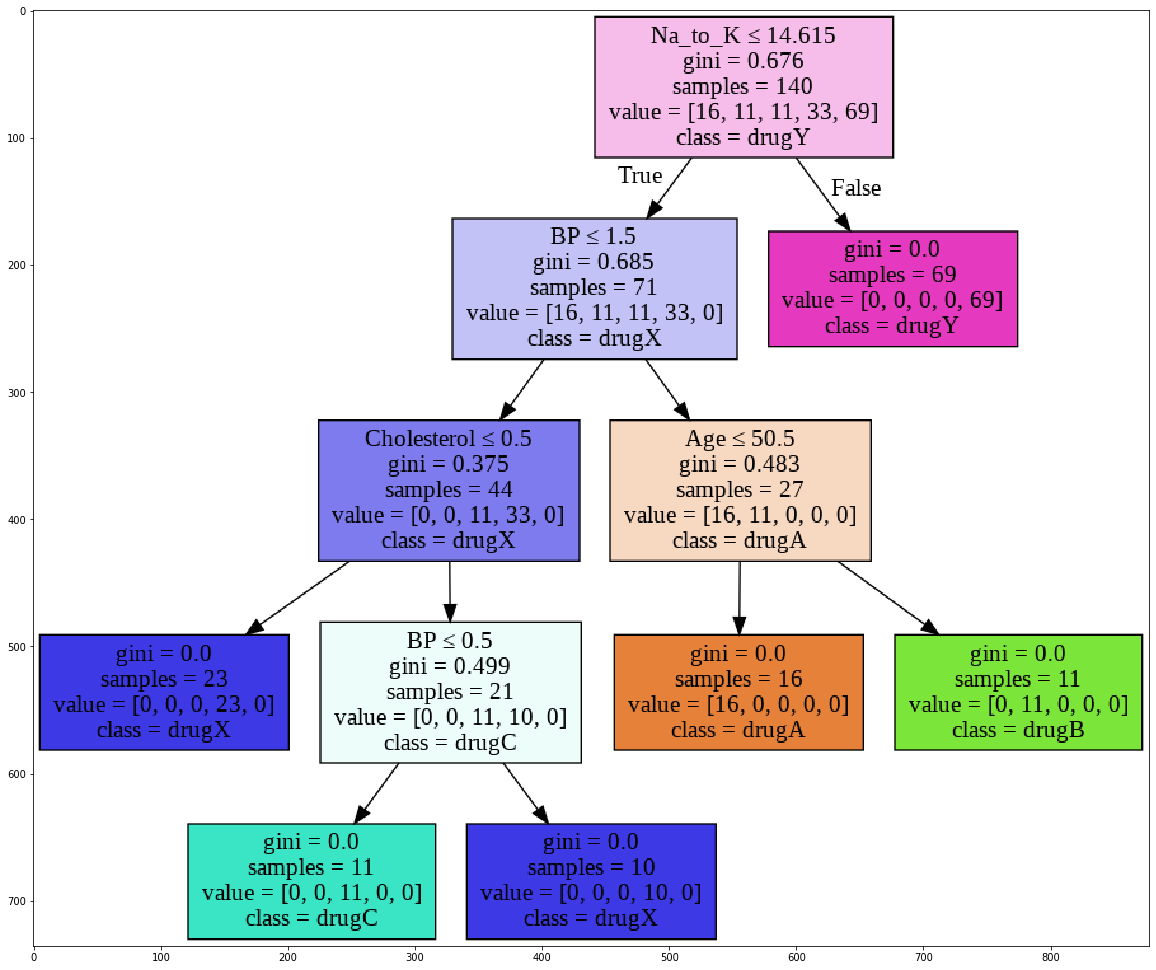

In [13]:
dot_data = StringIO()
filename = "drugtree.png"
featureNames = x.columns
targetNames = df["Drug"].unique().tolist()
out=tree.export_graphviz(drugTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_train), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(20, 20))
plt.imshow(img,interpolation='nearest')

In [14]:
y_pred  = drugTree.predict(x_test)
print(classification_report(y_test, y_pred))
print('\nAccuracy: {0:.4f}'.format(accuracy_score(y_test, y_pred)))
predictions = drugTree.predict(x_test)
print('Confusion Matrix:\n',confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         5
       drugC       1.00      1.00      1.00         5
       drugX       1.00      0.95      0.98        21
       drugY       0.96      1.00      0.98        22

    accuracy                           0.98        60
   macro avg       0.99      0.99      0.99        60
weighted avg       0.98      0.98      0.98        60


Accuracy: 0.9833
Confusion Matrix:
 [[ 7  0  0  0  0]
 [ 0  5  0  0  0]
 [ 0  0  5  0  0]
 [ 0  0  0 20  1]
 [ 0  0  0  0 22]]


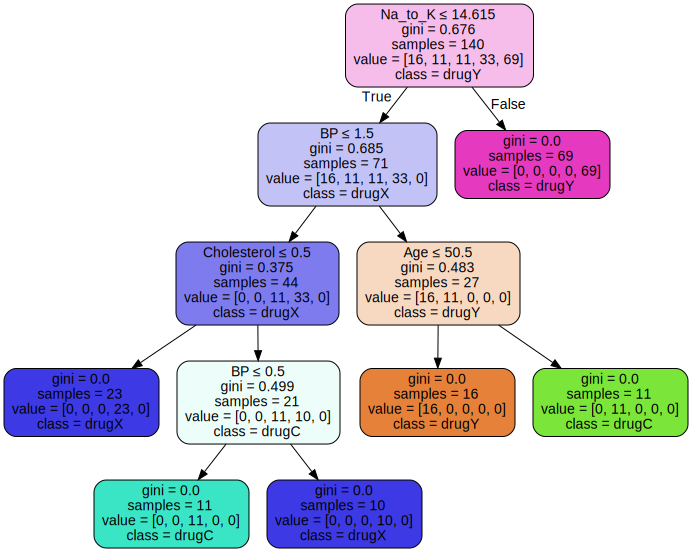

In [15]:
import graphviz
dot_data = tree.export_graphviz(drugTree, out_file=None, feature_names=x.columns,class_names=df.Drug,filled=True, rounded=True, special_characters=True)
valgTre = graphviz.Source(dot_data) 
valgTre

In [16]:
new_observation = [[30,1,1,0,10]]
drugTree.predict(new_observation)

array(['drugX'], dtype=object)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=0)
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
y_pred = rf.predict(x_test)
print(classification_report(y_test, y_pred))
print('\nAccuracy: {0:.4f}'.format(accuracy_score(y_test, y_pred)))
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         5
       drugC       1.00      1.00      1.00         5
       drugX       1.00      0.95      0.98        21
       drugY       0.96      1.00      0.98        22

    accuracy                           0.98        60
   macro avg       0.99      0.99      0.99        60
weighted avg       0.98      0.98      0.98        60


Accuracy: 0.9833
Confusion Matrix:
 [[ 7  0  0  0  0]
 [ 0  5  0  0  0]
 [ 0  0  5  0  0]
 [ 0  0  0 20  1]
 [ 0  0  0  0 22]]
